# Capstone project: Titanic Survival Prediction

In [1]:
# Capstone project: Titanic Survival Prediction

# Data Dictionary

| Variable   | Definition                       | Key                                           |
|------------|-----------------------------------|-----------------------------------------------|
| survival   | Survival                         | 0 = No, 1 = Yes                               |
| pclass     | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd                     |
| gender        | Gender                              |                                               |
| Age        | Age in years                     |                                               |
| sibsp      | # of siblings/spouses aboard     |                                               |
| parch      | # of parents/children aboard     |                                               |
| ticket     | Ticket number                    |                                               |
| fare       | Passenger fare                   |                                               |
| cabin      | Cabin number                     |                                               |
| embarked   | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |

---

## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)  
  - 1st = Upper  
  - 2nd = Middle  
  - 3rd = Lower  

- **age**:  
  - Age is fractional if less than 1.  
  - If the age is estimated, it is in the form of `xx.5`.

- **sibsp**: The dataset defines family relations as follows:  
  - Sibling = brother, sister, stepbrother, stepsister  
  - Spouse = husband, wife (mistresses and fiancés were ignored)  

- **parch**: The dataset defines family relations as follows:  
  - Parent = mother, father  
  - Child = daughter, son, stepdaughter, stepson  
  - Some children travelled only with a nanny; therefore, `parch=0` for them.


# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/Titanic-Dataset (1).csv') # Read the dataset.
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [8]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [10]:
df['Age'].median()

28.0

In [11]:
df['Age'].mode()

,Age
0,24.0


In [12]:
df['Age'] = df['Age'].fillna(28)
df = df.drop(columns=['Cabin'])
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [13]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [14]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().mean() * 100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
gender,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df = df.drop(columns=['Name','PassengerId'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [17]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [18]:
import plotly.express as px
import plotly.graph_objects as go

# Define label column and get value counts
label_col_name = 'Survived'
value_counts = df[label_col_name].value_counts()

# Create Pie Chart
fig_pie = px.pie(names=value_counts.index, values=value_counts.values,
                 title=f'Pie Chart of "{label_col_name}"',
                 labels={str(i): f'Category {i}' for i in value_counts.index})

# Display the plots
fig_pie.show()

# Encoding categorical variables

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
df.dtypes

,0
Survived,int64
Pclass,int64
gender,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [21]:
df['gender'].value_counts()

,count
gender,
male,577
female,314


In [22]:
df['gender'] = df['gender'].map({'male':0,'female':1})
df['gender'].value_counts()

,count
gender,
0,577
1,314


In [23]:
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,1,38.0,1,0,PC 17599,71.2833,C
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,1,35.0,1,0,113803,53.1000,S
4,0,3,0,35.0,0,0,373450,8.0500,S


In [24]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [25]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [26]:
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,1,35.0,1,0,113803,53.1000,0
4,0,3,0,35.0,0,0,373450,8.0500,0


In [27]:
df.dtypes

,0
Survived,int64
Pclass,int64
gender,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,int64


In [28]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [29]:
df['Ticket'].nunique()

681

In [30]:
df.shape

(891, 9)

In [31]:
(df['Ticket'].value_counts().shape[0] / df.shape[0]) * 100

76.43097643097643

In [32]:
df = df.drop(columns=['Ticket'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [33]:
df.dtypes

,0
Survived,int64
Pclass,int64
gender,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


# Train test split

In [34]:
df.drop(columns=['Survived'])

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [35]:
df[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [36]:
X = df.drop(columns=['Survived'])
y = df[['Survived']]

In [37]:
X.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [38]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [39]:
X.shape,y.shape

((891, 7), (891, 1))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X_train.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
651,2,1,18.0,0,1,23.0000,0
607,1,0,27.0,0,0,30.5000,0
206,3,0,32.0,1,0,15.8500,0
326,3,0,61.0,0,0,6.2375,0
625,1,0,61.0,0,0,32.3208,0


In [42]:
y_train.head()

,Survived
651,1
607,1
206,0
326,0
625,0


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[0.5       , 1.        , 0.22090978, ..., 0.16666667, 0.04489301,
        0.        ],
       [0.        , 0.        , 0.33400352, ..., 0.        , 0.05953204,
        0.        ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.03093714,
        0.        ],
       ...,
       [0.        , 0.        , 0.37170143, ..., 0.        , 0.05416439,
        0.5       ],
       [0.        , 0.        , 0.61045489, ..., 0.        , 0.17391982,
        0.5       ],
       [1.        , 1.        , 0.12038201, ..., 0.33333333, 0.04713766,
        0.        ]])

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [47]:
y_test['Survived'].unique()

array([0, 1])

In [48]:
label = y_test['Survived'].unique()
label

array([0, 1])

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8525280898876404
Test Accuracy: 0.7877094972067039


In [51]:
accuracy_score_list = []

for k in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([k,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,0.978933,0.759777
1,3,0.869382,0.815642
2,5,0.852528,0.787709
3,7,0.841292,0.810056
4,9,0.837079,0.815642
5,11,0.821629,0.804469
6,13,0.807584,0.804469
7,15,0.814607,0.810056
8,17,0.820225,0.804469
9,19,0.813202,0.804469


In [52]:
df = df.sort_values(by='test_accuracy',ascending=False)
df

,n_neighbors,train_accuracy,test_accuracy
1,3,0.869382,0.815642
4,9,0.837079,0.815642
7,15,0.814607,0.810056
3,7,0.841292,0.810056
8,17,0.820225,0.804469
5,11,0.821629,0.804469
9,19,0.813202,0.804469
6,13,0.807584,0.804469
2,5,0.852528,0.787709
0,1,0.978933,0.759777


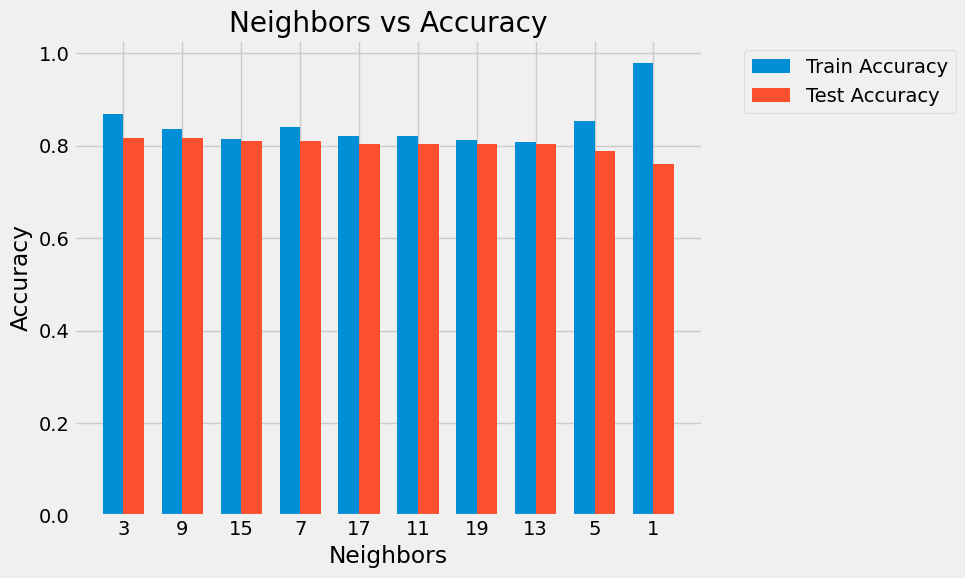

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

X_axis = np.arange(len(df['n_neighbors']))
width = 0.35

plt.bar(X_axis - width/2, df['train_accuracy'], width, label='Train Accuracy')
plt.bar(X_axis + width/2, df['test_accuracy'], width, label='Test Accuracy')

plt.xticks(X_axis, df['n_neighbors'])  # Set x-axis labels to 'n_neighbors' values
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8412921348314607
Test Accuracy: 0.8100558659217877


In [56]:
classifier

KNeighborsClassifier(n_neighbors=7)

In [57]:
scaler

MinMaxScaler()

In [58]:
import joblib
joblib.dump(classifier, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

#Prediction

In [59]:
import joblib
classifier = joblib.load('/content/knn_model.joblib')
scaler = joblib.load('/content/scaler.joblib')

In [60]:
classifier

KNeighborsClassifier(n_neighbors=7)

In [61]:
scaler

MinMaxScaler()

In [62]:
X.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [63]:
d = {'Pclass': 3,
 'gender': 0,
 'Age': 22.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

In [64]:
d

{'Pclass': 3,
 'gender': 0,
 'Age': 22.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

In [65]:
sample_data = pd.DataFrame([d])
sample_data

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.25,0


In [66]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[1.        , 0.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 0.        ]])

In [67]:
classifier.predict(scaled_data)[0]

np.int64(0)

In [68]:
classifier.predict_proba(scaled_data)[0]

array([0.71428571, 0.28571429])

In [69]:
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

In [70]:
d = {'Pclass': 1,
 'gender': 0,
 'Age': 100.0,
 'SibSp': 3,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

pred,prob = predict_survival(d)
pred,prob

(np.int64(0), np.float64(0.8571428571428571))

In [78]:
X.dtypes

,0
Pclass,int64
gender,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [85]:
X['Embarked'].unique()

array([0, 1, 2])

In [83]:
X['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


#Deploy

In [87]:
%%writefile app.py
import streamlit as st
import joblib
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

classifier = joblib.load('knn_model.joblib')
scaler = joblib.load('scaler.joblib')

def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

st.title("Titanic Survival Prediction Using KNN")

pclass = st.selectbox(
    "Pclass",
    [1, 2, 3],
    index=0
)

gender = st.selectbox(
    "Gender",
    ["male","female"],
    index=0
)

gender_map = {'male':0,'female':1}
gender = gender_map[gender]

age = st.number_input("Age",min_value=1.0, max_value=100.0, value=30.0)

sibsp = st.number_input("Sibsp",min_value=0, max_value=8, value=2)

parch = st.number_input("Parch",min_value=0, max_value=6, value=2)

fare = st.number_input("Fare",min_value=0.0, max_value=500.0, value=50.0)

embarked = st.selectbox(
    "Embarked",
    ["Cherbourg","Queenstown","Southampton"],
    index=0
)

embarked_map = {'Southampton':0,'Cherbourg':1,'Queenstown':2}
embarked = embarked_map[embarked]

if st.button("Predict survival"):
    d = {'Pclass': pclass,
        'gender': gender,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked': embarked}

    pred,prob = predict_survival(d)

    prob = round(prob,2)

    st.write(f"Survival prediction : {pred} and prob: {prob}")

Overwriting app.py


In [72]:
!pip list | grep scikit-learn

scikit-learn                          1.6.1


In [88]:
%%writefile requirements.txt
streamlit
pandas==2.2.2
joblib==1.4.2
scikit-learn==1.6.1

Overwriting requirements.txt


In [86]:
!python -V

Python 3.11.12


In [75]:
# Assignment: Perform indepth anlysis on titanic data using pandas, matplotlib and seaborn

In [76]:
# Other deployment can be done
# 1. Heart disease
# 2. Flower type prediction (setosa, versicolor or verginica)
# 3. Email spam classification
# 4. House price prediction (regression)